# Statistical Methods in Pandas - Lab

## Introduction

In this lesson you'll get some hands on experience using some of the key summary statistics methods in Pandas.

## Objectives:
You will be able to:

* Understand and use the df.describe() and df.info() summary statistics methods
* Use built-in Pandas methods for calculating summary statistics (.mean(), .std(), .count(), .sum(), .mean(), .median(), .std(), .var() and .quantile())
* Apply a function to every element in a Series or DataFrame using s.apply() and df.applymap()


## Getting Started

For this lab, we'll be working with a dataset containing information on various lego datasets.  You will find this dataset in the file `lego_sets.csv`.  

In the cell below:

* Import pandas and set the standard alias of `pd`
* Load in the `lego_sets.csv`dataset using the `read_csv()` function
* Display the head of the DataFrame to get a feel for what we'll be working with

In [8]:
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv('lego_sets.csv')

## Getting DataFrame-Level Statistics

We'll begin by getting some overall summary statistics on the dataset.  There are two ways we'll get this information-- `.info()` and `.describe()`.

### Using `.info()`

The `.info()` method provides us metadata on the DataFrame itself.  This allows to answer questions such as:

* What data type does each column contain?
* How many rows are in my dataset? 
* How many total non-missing values does each column contain?
* How much memory does the DataFrame take up?

In the cell below, call our DataFrame's `.info()` method. 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 14 columns):
ages                 12261 non-null object
list_price           12261 non-null float64
num_reviews          10641 non-null float64
piece_count          12261 non-null float64
play_star_rating     10486 non-null float64
prod_desc            11884 non-null object
prod_id              12261 non-null float64
prod_long_desc       12261 non-null object
review_difficulty    10206 non-null object
set_name             12261 non-null object
star_rating          10641 non-null float64
theme_name           12258 non-null object
val_star_rating      10466 non-null float64
country              12261 non-null object
dtypes: float64(7), object(7)
memory usage: 1.3+ MB


#### Interpreting the Results

Read the output above, and then answer the following questions:

How many total rows are in this DataFrame?  How many columns contain numeric data? How many contain categorical data?  Identify at least 3 columns that contain missing values. 

Write your answer below this line:
________________________________________________________________________________________________________________________________



In [11]:
def normalize_col(series):
    mu = series.mean()
    std = series.std()
    series.map(lambda x: (x-mu)/std)
    return series
for col in df.columns:
    if df[col].dtype in [np.float64]:
        df[col] = normalize_col(df[col])
        print('Transformed {} to standard normal variable.')
        print('Now mu: {} std: {}'.format(df[col].mean(), df[col].std()))
    else:
        continue

Transformed {} to standard normal variable.
Now mu: 65.14199840959138 std: 91.9804293059243
Transformed {} to standard normal variable.
Now mu: 16.82623813551358 std: 36.368983772831406
Transformed {} to standard normal variable.
Now mu: 493.40592121360413 std: 825.3645804115228
Transformed {} to standard normal variable.
Now mu: 4.337640663742133 std: 0.6520510342493991
Transformed {} to standard normal variable.
Now mu: 59836.7523040535 std: 163811.45233571716
Transformed {} to standard normal variable.
Now mu: 4.514134009961469 std: 0.5188653617448266
Transformed {} to standard normal variable.
Now mu: 4.22896044334034 std: 0.6602821277744396


Answer question here...

## Using `.describe()`

Whereas `.info()` provides statistics about the DataFrame itself, `.describe()` returns output containing basic summary statistics about the data contained with the DataFrame.  

In the cell below, call the DataFrame's `.describe()` method. 

In [12]:
df.describe()

,list_price,num_reviews,piece_count,play_star_rating,prod_id,star_rating,val_star_rating
count,12261.000000,10641.000000,12261.000000,10486.000000,1.226100e+04,10641.000000,10466.000000
mean,65.141998,16.826238,493.405921,4.337641,5.983675e+04,4.514134,4.228960
std,91.980429,36.368984,825.364580,0.652051,1.638115e+05,0.518865,0.660282
min,2.272400,1.000000,1.000000,1.000000,6.300000e+02,1.800000,1.000000
25%,19.990000,2.000000,97.000000,4.000000,2.103400e+04,4.300000,4.000000
50%,36.587800,6.000000,216.000000,4.500000,4.206900e+04,4.700000,4.300000
75%,70.192200,13.000000,544.000000,4.800000,7.092200e+04,5.000000,4.700000
max,1104.870000,367.000000,7541.000000,5.000000,2.000431e+06,5.000000,5.000000


#### Interpreting the Results

The output contains descriptive statistics corresponding to the columns.  Use these to answer the following questions:

How much is the standard deviation for piece count?  How many pieces are in the largest lego set?  How many in the smallest lego set? What is the median `val_star_rating`?

________________________________________________________________________________________________________________________________

Answer questions here...

## Getting Summary Statistics

Pandas also allows us to easily compute individual summary statistics using built-in methods.  Next, we'll get some practice using these methods. 

In the cell below, compute the median value of the `star_rating` column.

In [13]:
df.ages.value_counts()

6-12     1476
7-14     1421
8-14     1180
4-7       957
5-12      911
10+       870
2-5       840
7-12      723
9-14      624
16+       420
8-12      350
4-99      311
12+       298
6-14      233
8+        226
1½-3      213
14+       212
10-21     184
10-16     148
6+        148
1½-5      113
9-16       92
5+         71
11-16      66
9-12       46
12-16      42
10-14      21
9+         21
4+         21
5-8        21
7+          2
Name: ages, dtype: int64

Next, get a count of the total number of values in `play_star_rating`.

In [14]:
bins = ['0-5','5-8','8-12','12-18','18-25','25-35','35-55','55-65']
up_lims = [int(bin.split('-')[-1].strip('+')) for bin in bins]
bin_map = {}
for age in df.ages.unique():
    cur_up_lim = int(age.split('-')[-1].strip('+'))
    for n, new_up_lim in enumerate(up_lims):
        if cur_up_lim <= new_up_lim:
            bin_map[age] = bins[n]
            break

Now, compute the standard deviation of the `list_price` column.

In [21]:
bin_map

{'6-12': '8-12',
 '12+': '8-12',
 '7-12': '8-12',
 '10+': '8-12',
 '5-12': '8-12',
 '8-12': '8-12',
 '4-7': '5-8',
 '4+': '0-5',
 '9-12': '8-12',
 '16+': '12-18',
 '14+': '12-18',
 '9-14': '12-18',
 '7-14': '12-18',
 '8-14': '12-18',
 '6+': '5-8',
 '2-5': '0-5',
 '1½-3': '0-5',
 '1½-5': '0-5',
 '9+': '8-12',
 '5-8': '5-8',
 '10-21': '18-25',
 '8+': '5-8',
 '6-14': '12-18',
 '5+': '0-5',
 '10-16': '12-18',
 '10-14': '12-18',
 '11-16': '12-18',
 '12-16': '12-18',
 '9-16': '12-18',
 '7+': '5-8'}

In [17]:
up_lims = [int(bin.split('-')[-1].strip('+')) for bin in bins]
up_lims

[5, 8, 12, 18, 25, 35, 55, 65]

If we bought every single lego set in this dataset, how many pieces would we have?  Use the `.sum()` method on the correct column to compute this. 

In [18]:
for n, new_up_lim in enumerate(up_lims):
    print(n, new_up_lim)

0 5
1 8
2 12
3 18
4 25
5 35
6 55
7 65


Now, let's try getting the value for the 90% quantile.  Do this in the cell below.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

AttributeError: 'DataFrame' object has no attribute 'ages2'

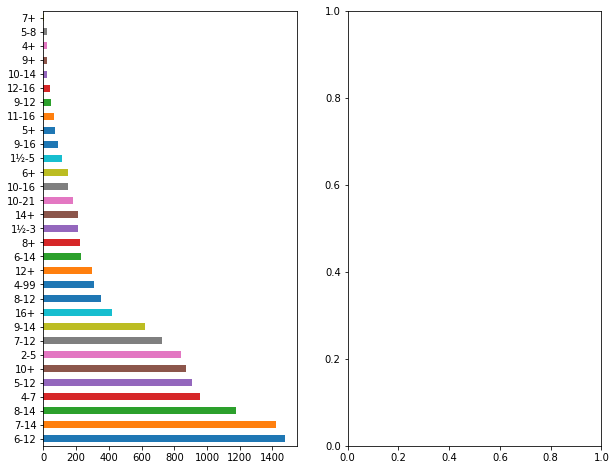

In [7]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,8))
df.ages.value_counts().plot(ax=ax1, kind='barh')
df.ages2.value_counts().plot(ax=ax2, kind='barh');

## Getting Summary Statistics on Categorical Data

For obvious reasons, most of the methods we've used so far only work with numerical data--there's no way to calculate the standard deviation of a column containing string values. However, there are some things that we can discover about columns containing categorical data. 

In the cell below, get the `.unique()` values contained within the `review_difficulty` column. 

Now, let's get the `value_counts` for this column, to see how common each is. 

As you can see, these provide us quick and easy ways to get information on columns containing categorical information.  


## Using `.applymap()`

When working with pandas DataFrames, we can quickly compute functions on the data contained by using the `applymap()` function and passing in a lambda function. 

For instance, we can use `applymap()` to return a version of the DataFrame where every value has been converted to a string.

In the cell below:

* Call our DataFrame's `.applymap()` function and pass in `lambda x: str(x)`
* Call our new `string_df` object's `.info()` method to confirm that everything has been cast to a string

In [ ]:
string_df = None

Note that everything--even the `NaN` values, have been cast to a string in the example above. 

Note that for pandas Series objects (such as a single column in a DataFrame), we can do the same thing using the `apply()` method.  

This is just one example of how we can quickly compute custom functions on our DataFrame--this will become especially useful when we learn how to **_normalize_** our datasets in a later section!

# Conclusion

In this lab, we learned how to:

* Understand and use the df.describe() and df.info() summary statistics methods
* Use built-in Pandas methods for calculating summary statistics (.mean(), .std(), .count(), .sum(), .mean(), .median(), .std(), .var() and .quantile())
* Apply a function to every element in a Series or DataFrame using s.apply() and df.applymap()